# Fuse multiple chunks and run the Poisson reconstruction

This notebook aims at fusing a few chunks of data together and creating a mesh using screened Poisson reconstruction.

We start by importing a few libraries, then plotting the cropping boxes. 

In [19]:
import numpy as np 
import matplotlib.pyplot as plt


import cloudComPy as cc # cloud compare python interface.
if cc.isPluginCanupo():
    import cloudComPy.Canupo

if cc.isPluginPCL():
    import cloudComPy.PCL
from osgeo import gdal, ogr, osr
from subprocess import run

import json

import os
from yaml import load
from yaml.loader import Loader

from helpers.utils import plot_segmentation_scheme

In [20]:
caveName = "01_VersChezLeBrandt"
root = f"../../real_data/{caveName}"

PROCESSING_FILEPATH = os.path.join(root, "params.yaml")
p = load(open(PROCESSING_FILEPATH), Loader)
shift = p["alignment"]["globalShift"]

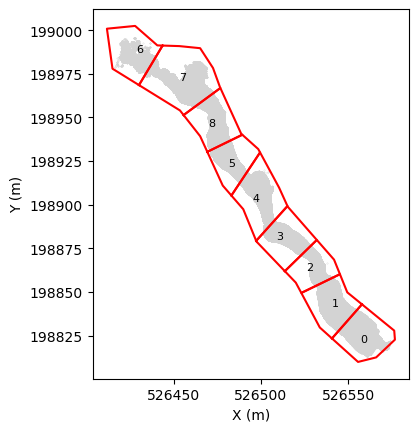

In [21]:
fig, ax = plt.subplots()

ax, res = plot_segmentation_scheme(root, ax)

plt.xlabel("X (m)")
plt.ylabel("Y (m)")

plt.show()

In [22]:
# now select the segments we want to fuse together. 

toBeFused = list(range(0,13))

suffix = [str(i) for i in toBeFused]

In [23]:
fp = os.path.normpath(os.path.join(root, "process/cropped_clouds", "Cropped_{i}_normals_reoriented.ply"))

In [24]:
paths = [fp.format(i=i) for i in toBeFused]

In [27]:
shift[2] = 1100

In [28]:
shift

[-526500, -198900, 1100]

In [29]:
clouds = [cc.loadPointCloud(fp,  cc.CC_SHIFT_MODE.XYZ, 0, *shift) for fp in paths]

In [30]:
merged = cc.MergeEntities(clouds, deleteOriginalClouds= True, createSFcloudIndex= False)

In [31]:
ret = cc.SavePointCloud(merged, os.path.join(root, f"output/{caveName}_full.ply"))